In [42]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas
import datetime as dt

In [126]:
# Loading the csv file.
x = pandas.read_csv("Train.csv")
samples = x["Count"]
date_format = "%d-%m-%Y %H:%M"
N = len(samples)

first_date = dt.datetime.strptime(x["Datetime"][0], date_format)
last_date = dt.datetime.strptime(x["Datetime"][N-1], date_format)

interval = (last_date-first_date).days
frequency = N / interval

print(f"Frecventa este de {frequency} Hz")
print(f"Intervalul de timp este {first_date} - {last_date}, adica {interval} secunde")
print(f"Frecventa maxima prezenta in semnal este {frequency/2}")

Frecventa este de 24.001312407721333 Hz
Intervalul de timp este 2012-08-25 00:00:00 - 2014-09-25 23:00:00, adica 761.9583333333334 secunde
Frecventa maxima prezenta in semnal este 12.000656203860666


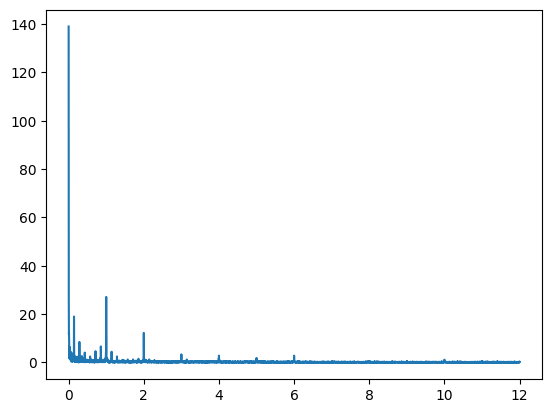

In [127]:
# Computing the fourier transform.
fft = np.fft.fft(samples)
fft = np.abs(fft / len(samples))
fft = fft[:len(samples)//2]
f = frequency/N * np.linspace(0, N/2, N//2)

plt.plot(f, fft)

Eliminating component: 138.95811461067368


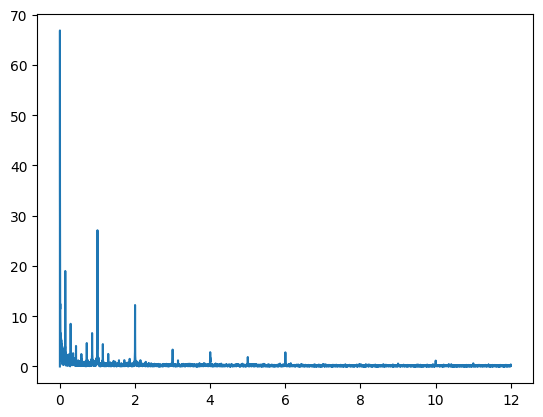

In [128]:
# Eliminating the continuous component

component = fft[0]
new_samples = samples - component
print(f"Eliminating component: {component}")

fft = np.fft.fft(new_samples)
fft = np.abs(fft / N)
fft = fft[:N//2]
f = frequency/N * np.linspace(0, N/2, N//2)
plt.plot(f, fft)

In [135]:
# Computing the 4 best values in the fft.
idx = np.argsort(fft)[-5:]
results = f[idx]
print(results)

[0.14306809 0.00393765 1.00016406 0.0026251  0.00131255]
